Import Libraries

Import essential Python libraries for data analysis, visualization, and machine learning.
numpy, pandas: Data manipulation and analysis.
matplotlib.pyplot, seaborn: For data visualization.
scikit-learn modules: Provide tools for splitting data, scaling features, building the KNN classifier, and evaluating the model.
These imports are the foundation for building the KNN pipeline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Load the Dataset

Load the Iris dataset CSV into a pandas DataFrame.
pd.read_csv() reads the file from the given path.
.head() displays the first few rows to verify that the data loaded correctly.
This step is crucial to ensure we’re working with the right data.

In [2]:
df = pd.read_csv("C:/Users/swath/Downloads/Iris/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Inspect Data Info

.info(): Checks data types, column names, and non-null counts.
.describe(): Provides summary statistics (mean, std, min, max).
These commands help us understand the structure and basic stats of the dataset before modeling.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Check for Missing Values and Class Distribution

.isnull().sum(): Detects missing values in any column.
value_counts(): Shows how many samples exist for each Iris species.
Ensures data quality and checks for class balance (which affects classification performance).

In [4]:
df.isnull().sum()
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Drop Unnecessary Column

The Id column is just an index and has no predictive power.
Dropping it avoids noise in our model.
Always remove irrelevant columns to improve model quality.

In [5]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualize Feature Relationships

Creates pairwise scatterplots of features colored by species.
Helps visualize how classes separate in feature space.
Useful for understanding if KNN (a distance-based classifier) will perform well.

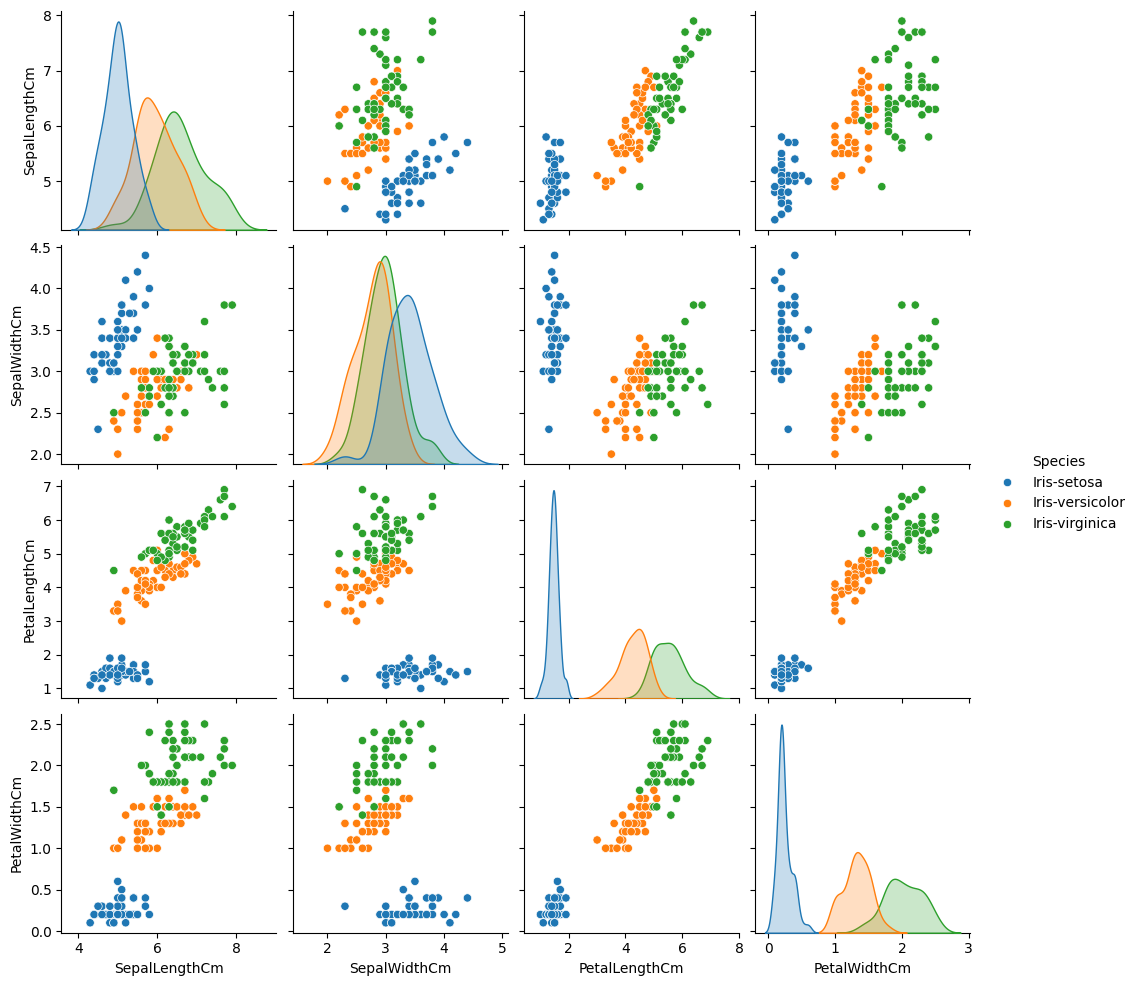

In [7]:
sns.pairplot(df, hue='Species')
plt.show()

Visualize Class Distribution

Shows the number of samples per class.
Confirms that the dataset is balanced (all classes have equal samples).
Balanced classes help avoid bias during training.

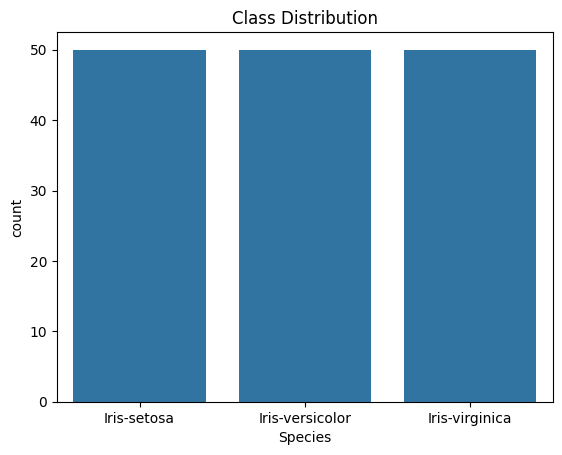

In [8]:
sns.countplot(data=df, x='Species')
plt.title('Class Distribution')
plt.show()

Define Features and Target

X: Feature matrix with numeric measurements of flowers.
y: Target labels indicating species.
Separating features and target is necessary for supervised learning.

In [9]:
X = df.drop('Species', axis=1)
y = df['Species']

Normalize Features

KNN relies on distance calculations.
Features with different scales can distort distance.
StandardScaler standardizes features to have mean 0 and variance 1, ensuring all features contribute equally.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split into Train and Test Sets

Splits data into 80% training and 20% testing.
stratify=y ensures all species are proportionally represented in both sets.
Splitting data prevents overfitting and enables proper evaluation.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Train KNN Classifier (K=5)

Initializes KNN with 5 neighbors (common default).
Fits the model on training data.
Predicts labels for test data.
The K value controls the smoothness of decision boundaries.

Evaluate Model Performance

Accuracy Score: Overall % of correct predictions.
Confusion Matrix: Shows true vs predicted classes.
Classification Report: Precision, Recall, F1 for each class.

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



ConfusionMatrixDisplay plots the confusion matrix visually.
These metrics help assess model quality and reveal misclassifications.

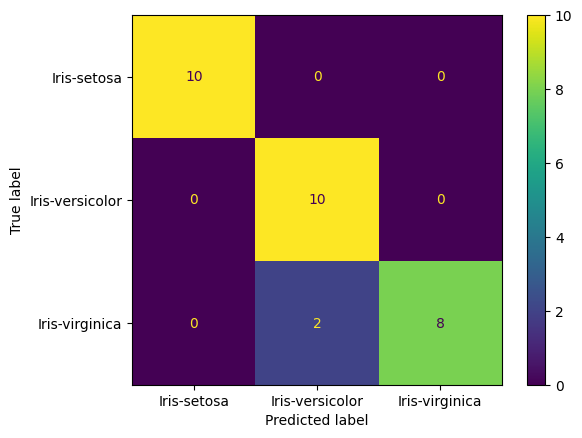

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Experiment with Different K Values

Tests K values from 1 to 20.
For each K, trains and evaluates accuracy.
Helps find the optimal K value by comparing performance.
Tuning K is crucial because too low/high K can cause under/overfitting.


Plot Accuracy vs. K

Visualizes how accuracy changes with different K.
Helps choose the K with best validation accuracy.
Easy way to interpret model tuning results.

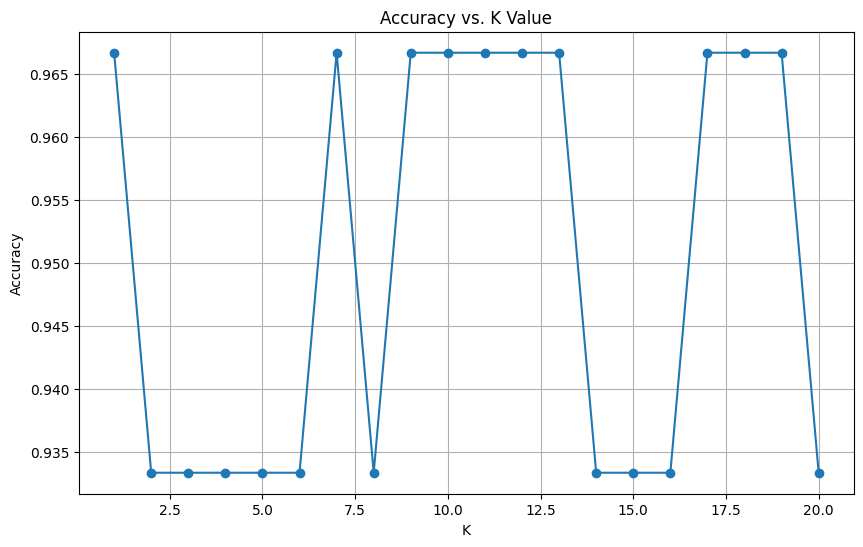

In [14]:
k_range = range(1, 21)
scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    scores.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Select Best K Value

Finds K with highest accuracy.
Prints optimal K and its accuracy.
Ensures final model uses best-performing parameter.

In [15]:
best_k = k_range[np.argmax(scores)]
print(f"Best K value: {best_k} with Accuracy: {max(scores):.2f}")

Best K value: 1 with Accuracy: 0.97


Train Final Model with Best K

Trains KNN using best K value found in tuning.
Predicts on test data.
Evaluates accuracy and classification metrics again.
Confirms final model quality for reporting and deployment.

In [16]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
final_pred = final_knn.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, final_pred))
print(classification_report(y_test, final_pred))

Final Model Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



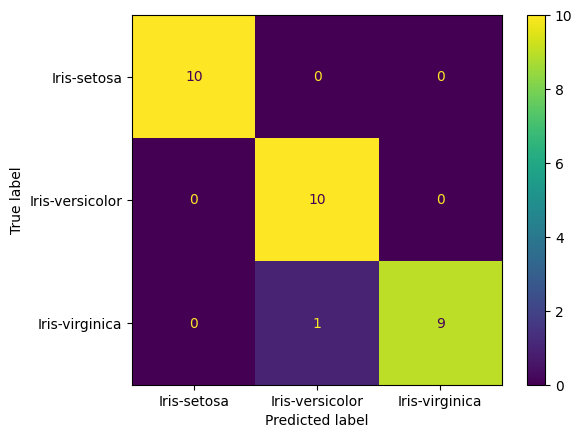

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, final_pred)
plt.show()